### Importação dos dados



In [15]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja1 = pd.read_csv("Loja_1.csv")
loja2 = pd.read_csv("Loja_2.csv")
loja3 = pd.read_csv("Loja_3.csv")
loja4 = pd.read_csv("Loja_4.csv")
lojas = pd.concat([loja1, loja2, loja3, loja4], ignore_index=True)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [ ]:
lojas.columns
print(lojas.columns)

Index(['Produto', 'Categoria do Produto', 'Preço', 'Frete', 'Data da Compra',
       'Vendedor', 'Local da compra', 'Avaliação da compra',
       'Tipo de pagamento', 'Quantidade de parcelas', 'lat', 'lon',
       'Faturamento'],
      dtype='object')


In [49]:
lojas['Faturamento'] = loja['Preço'] + loja['Frete']

In [50]:
faturamento_total = lojas['Faturamento'].sum()
print(f'Faturamento total : R$ {faturamento_total:,.2f}')

Faturamento total : R$ 1,616,347.09


# 2. Gráfico de Barras: Faturamento po loja

Faturamento total: R$ 3,184,120.31


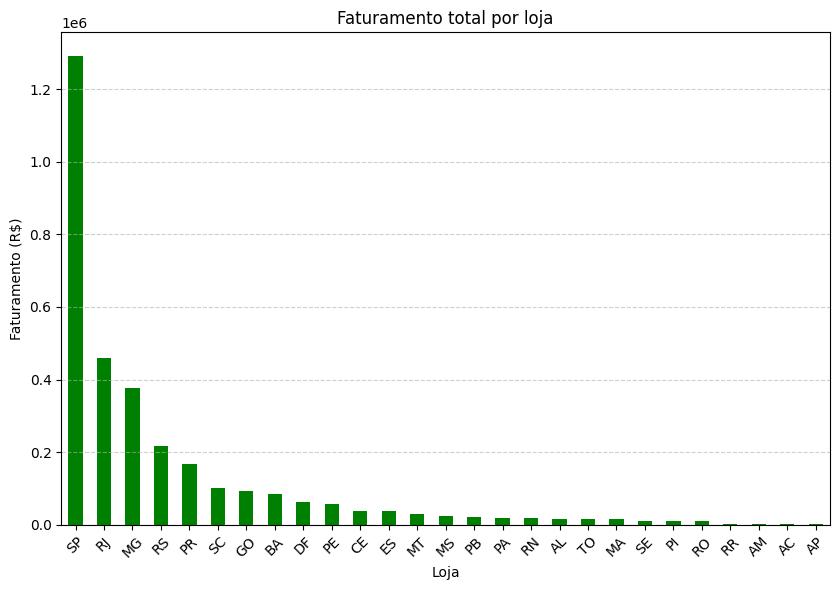

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

loja1 = pd.read_csv("Loja_1.csv")
loja2 = pd.read_csv("Loja_2.csv")
loja3 = pd.read_csv("Loja_3.csv")
loja4 = pd.read_csv("Loja_4.csv")

lojas = pd.concat([loja1, loja2, loja3, loja4], ignore_index=True)

lojas['Faturamento'] = lojas['Preço'] + lojas['Frete']

faturamento_total = lojas['Faturamento'].sum()
print(f'Faturamento total: R$ {faturamento_total:,.2f}')

faturamento_por_loja = lojas.groupby('Local da compra')['Faturamento'].sum()

plt.figure(figsize=(8.5, 6))
faturamento_por_loja.sort_values(ascending=False).plot(kind='bar', color='green')
plt.title('Faturamento total por loja')
plt.ylabel('Faturamento (R$)')
plt.xlabel('Loja')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


# 2. Vendas por Categoria


In [ ]:
lojas['Faturamento'] = loja['Preço'] + loja['Frete']

In [ ]:
vendas_por_categoria = lojas.groupby('Categoria do Produto')['Faturamento'].sum().sort_values(ascending=False)
vendas_por_categoria

Categoria do Produto
eletronicos              603278.238660
eletrodomesticos         510678.320571
moveis                   263505.317336
instrumentos musicais    128243.495861
esporte e lazer           55216.657567
brinquedos                25299.265959
utilidades domesticas     17789.381598
livros                    12336.410244
Name: Faturamento, dtype: float64

# 3. Gráfico de pizza: Distribuição das Categorias de Produto

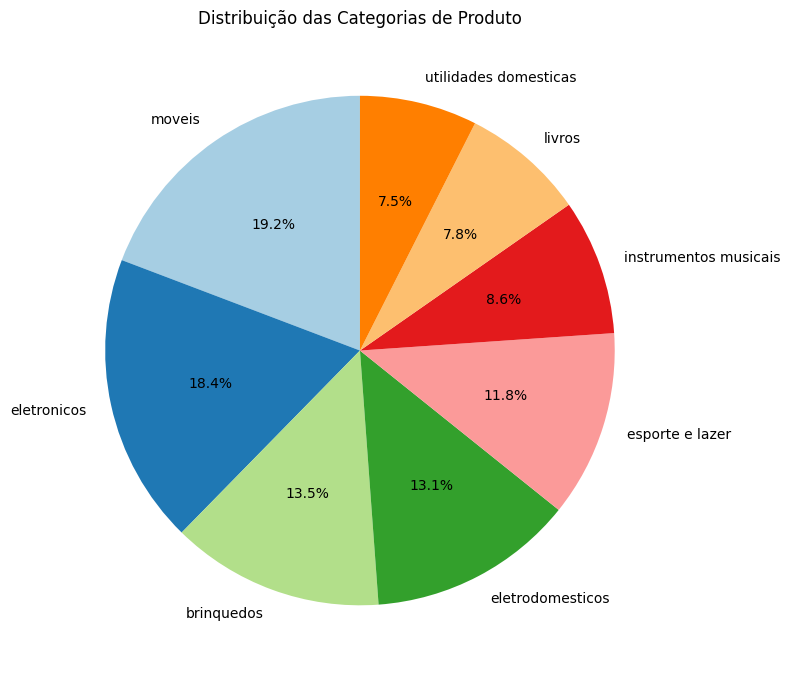

In [56]:

categorias = lojas['Categoria do Produto'].value_counts()
plt.figure(figsize=(8, 8))
categorias.plot(kind='pie', autopct='%1.1f%%', colors=plt.cm.Paired.colors, startangle=90)
plt.title('Distribuição das Categorias de Produto')
plt.ylabel('')
plt.tight_layout()
plt.show()

# 3. Média de Avaliação das Lojas

In [ ]:
media_avaliacoes = loja.groupby('Local da compra')['Avaliação da compra'].mean().sort_values(ascending=False)


In [ ]:
print(media_avaliacoes)

Local da compra
AC    5.000000
RO    4.600000
PI    4.500000
MA    4.500000
PE    4.387097
MG    4.124528
TO    4.090909
SP    4.089431
PB    4.071429
DF    4.037736
RS    4.000000
RN    4.000000
MT    4.000000
SC    3.978947
PR    3.968750
GO    3.882353
ES    3.868421
AL    3.800000
AP    3.750000
CE    3.750000
MS    3.666667
RJ    3.637584
BA    3.573333
SE    3.357143
PA    3.272727
AM    2.666667
Name: Avaliação da compra, dtype: float64


# 4. Produtos Mais e Menos Vendidos

In [20]:
import matplotlib.pyplot as plt

In [21]:
for loja_nome, dados_loja in lojas.groupby('Local da compra'):
    resumo = dados_loja["Produto"].value_counts()

Mais vendidos

In [29]:
mais_vendidos = resumo.idxmax()
qtd_mais = resumo.max()
print(f'O produto mais vendidos : {mais_vendidos} {qtd_mais}')

O produto mais vendidos : Cama box 5


Menos vendido

In [28]:
menos_vendido = resumo.idxmin()
qtd_menos = resumo.min()
print(f'O produto menos vendido : {menos_vendido} {qtd_menos}')

O produto menos vendido : Cubo mágico 8x8 1


# 5. Frete Médio por Loja


In [30]:
frete_medio_por_loja = lojas.groupby('Local da compra')['Frete'].mean().reset_index()
print(frete_medio_por_loja)

   Local da compra       Frete
0               AC   63.638462
1               AL   29.151392
2               AM   21.435096
3               AP   16.491483
4               BA   28.179576
5               CE   27.183673
6               DF   25.276722
7               ES   25.571067
8               GO   43.632618
9               MA   31.458853
10              MG   34.888313
11              MS   32.886329
12              MT   34.204018
13              PA   25.547012
14              PB   39.002695
15              PE   36.837088
16              PI   45.021395
17              PR   36.935061
18              RJ   38.103198
19              RN   43.705640
20              RO   50.161699
21              RR  169.541339
22              RS   39.106780
23              SC   27.367645
24              SE   31.140915
25              SP   33.208896
26              TO   45.367544


# 2. Gráfico de dispersão: Relação entre Frete e Preço

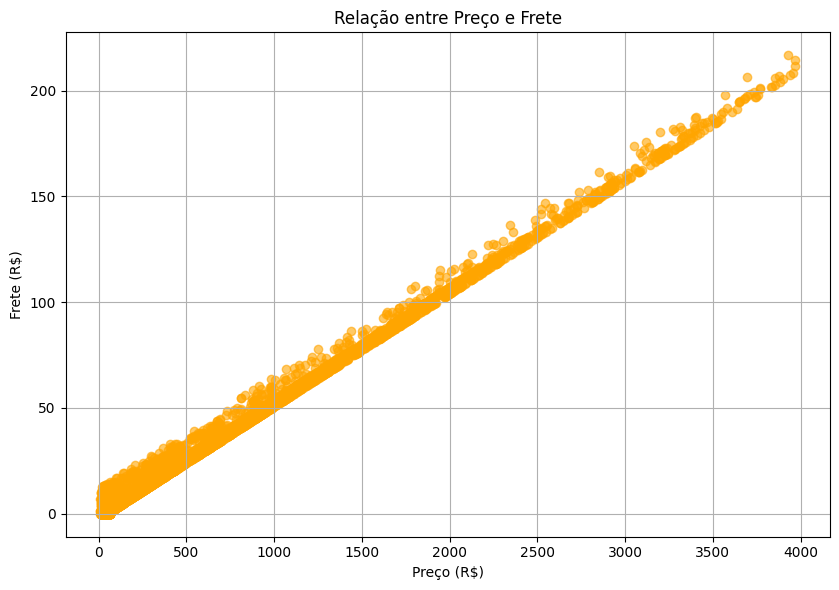

In [ ]:

plt.figure(figsize=(8.5, 6))
plt.scatter(lojas['Preço'], lojas['Frete'], alpha=0.6, color='orange')
plt.title('Relação entre Preço e Frete')
plt.xlabel('Preço (R$)')
plt.ylabel('Frete (R$)')
plt.grid(True)
plt.tight_layout()
plt.show()